# fixaug3 test

In [1]:
import torch
from torch.utils.data import DataLoader
import os
from torchsummary import summary
from collections import defaultdict
from datasets.transforms import get_data_transforms
from datasets.utils import separate_datasets, show_samples,Data_loader
from models.model import get_model
from models.train import train_model
from models.metrics import update_mean_metrics, print_metrics


In [2]:
cfg = {
    'purpose' : 'fixaug3',
    'data_dir' : './data/CXR',
    'mu' : 4,
    'fold' : 5,
    'epochs' : 20
}
dataset_types = ['train', 'test']

if not os.path.exists(os.path.join(cfg['data_dir'],'test.txt')):
    from datasets.utils import make_baseline_dataset
    make_baseline_dataset('./data/CXR',25,outpath = cfg['data_dir']) # test는 전부, train은 25개 만큼만
if not os.path.exists(os.path.join(cfg['data_dir'],'train_lb_0.txt')):
    from datasets.utils import separate_datasets
    separate_datasets('./data/CXR', cfg['fold'], 25, cfg['mu'],outpath = cfg['data_dir']) # lb는 25개, ulb는 mu*25개
                      

In [3]:
loader_test = Data_loader('train', cfg, fold_id=0)
class_names = loader_test.class_names

loader_test = DataLoader(loader_test, batch_size=1, num_workers=4, shuffle=True,
                              collate_fn=loader_test.collate_fn)

In [4]:
class_names

{0: 'Covid-19', 1: 'Normal', 2: 'Pneumonia'}

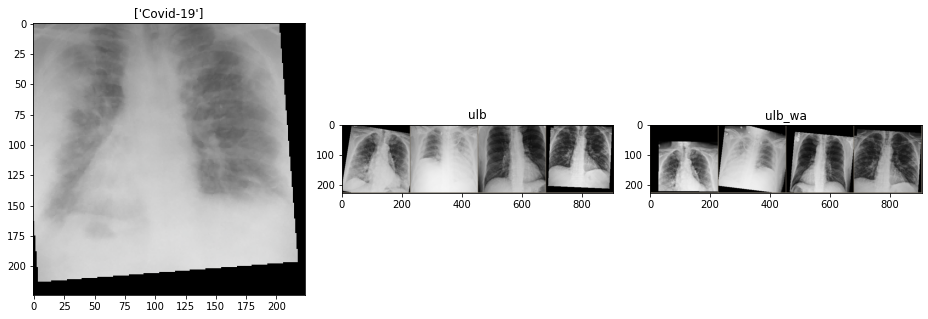

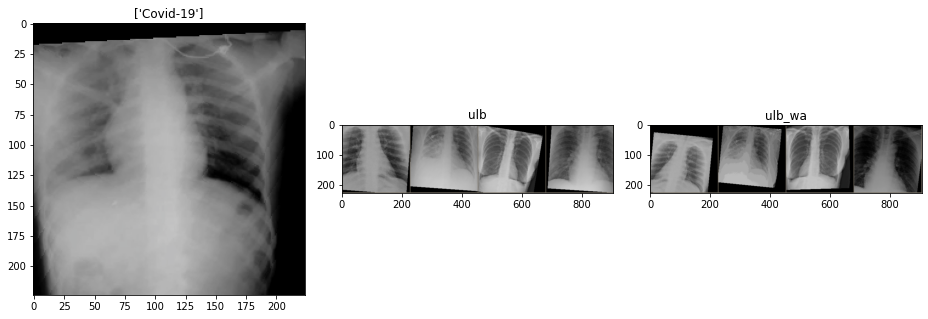

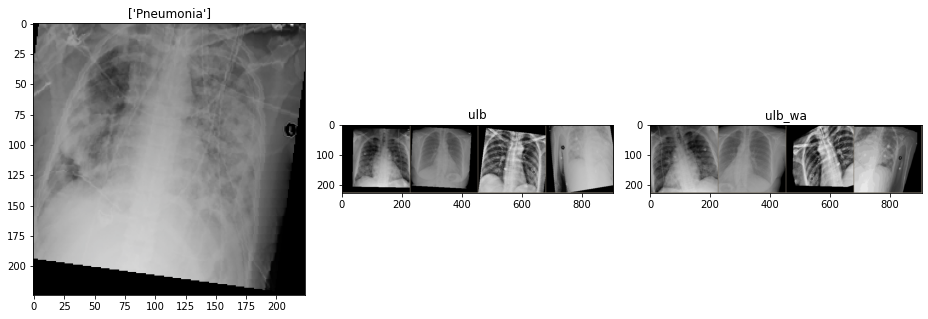

In [5]:
show_iteration = 3
show_samples(loader_test,class_names,show_iteration,cfg['mu'])

In [6]:


trained_models = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cls_names = ['All', 'COVID-19', 'Pneumonia', 'Normal']
metric_types = ['acc'] # metric_types = ['acc', 'ppv', 'recall', 'f1']
mean_metrics = {m_type: defaultdict(float) for m_type in metric_types}
test_loader = Data_loader('test', cfg)
test_loader = DataLoader(test_loader, batch_size=6, num_workers=4, shuffle=True,
                              collate_fn=test_loader.collate_fn)

data_loaders ={'test':test_loader}
dataset_sizes ={'test':len(test_loader)}


In [ ]:
for i in range(cfg['fold']):
    train_loaders = Data_loader('train', cfg, i)
    train_loaders = DataLoader(train_loaders, batch_size=6, num_workers=4, shuffle=True,
                              collate_fn=train_loaders.collate_fn)
    data_loaders['train']=train_loaders
    dataset_sizes['train']=len(train_loaders)
    model_ft, criterion, optimizer_ft, exp_lr_scheduler = get_model(device, fine_tuning=False)
    model, metrics = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, i, cls_names,
                                 metric_types, dataset_types, data_loaders, dataset_sizes, device, num_epochs=cfg['epochs'],
                                 lambda_u=1.0, threshold=0.95, purpose=cfg['purpose'])
    trained_models.append(model)
    mean_metrics = update_mean_metrics(cls_names, mean_metrics, metrics, status='training')

mean_metrics = update_mean_metrics(cls_names, mean_metrics, status='final', fold=cfg['fold'])
print_metrics(mean_metrics, cls_names, phase='Mean results')

--------------------
Model 1
--------------------

Epoch 0/19
----------
[train]
LOSS - 6.5620
ACC - 1.9231
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 5.3287
ACC - 3.7197

Validation loss decreased (inf --> 5.328743).

Epoch 1/19
----------
[train]
LOSS - 5.7301
ACC - 2.9231
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 4.7079
ACC - 4.6780

Validation loss decreased (5.328743 --> 4.707907).

Epoch 2/19
----------
[train]
LOSS - 5.0374
ACC - 3.6923
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 5.0672
ACC - 3.7121

EarlyStopping counter: 1 out of 5

Epoch 3/19
----------
[train]
LOSS - 4.9005
ACC - 3.6923
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 3.6978
ACC - 4.7955

Validation loss decreased (4.707907 --> 3.697781).

Epoch 4/19
----------
[train]
LOSS - 5.1922
ACC - 3.4615
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 3.3246
ACC - 4.7235

Validation loss decreased (3.697781 --> 3.324574).

Epoch 5/19
----------
[train]
LOSS - 4.5290
ACC - 3.9231
Mask ratio's range: 0.9166666641831398 

# Base Test

In [1]:
import torch
from torch.utils.data import DataLoader
import os
from torchsummary import summary
from collections import defaultdict
from datasets.transforms import get_data_transforms
from datasets.utils import separate_datasets, show_samples,Data_loader
from models.model import get_model
from models.train import train_model
from models.metrics import update_mean_metrics, print_metrics


In [2]:
cfg = {
    'purpose' : 'baseline',
    'data_dir' : './data/CXR',
    'mu' : 4,
    'fold' : 5,
    'epochs' : 20
}
dataset_types = ['train', 'test']

if not os.path.exists(os.path.join(cfg['data_dir'],'test.txt')):
    from datasets.utils import make_baseline_dataset
    make_baseline_dataset('./data/CXR',25,outpath = cfg['data_dir']) # test는 전부, train은 25개 만큼만
if not os.path.exists(os.path.join(cfg['data_dir'],'train_lb_0.txt')):
    from datasets.utils import separate_datasets
    separate_datasets('./data/CXR', cfg['fold'], 25, cfg['mu'],outpath = cfg['data_dir']) # lb는 25개, ulb는 mu*25개
                      

In [3]:
loader_test = Data_loader('train', cfg, fold_id=0)
class_names = loader_test.class_names

loader_test = DataLoader(loader_test, batch_size=1, num_workers=4, shuffle=True,
                              collate_fn=loader_test.collate_fn)

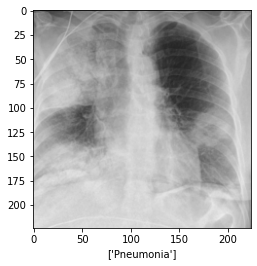

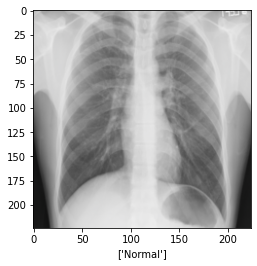

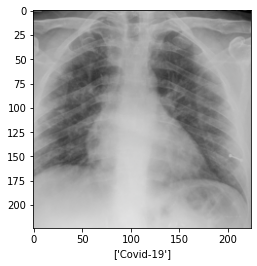

In [4]:
show_iteration = 3
show_samples(loader_test,class_names,show_iteration,cfg['mu'])

In [5]:


trained_models = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cls_names = ['All', 'COVID-19', 'Pneumonia', 'Normal']
metric_types = ['acc'] # metric_types = ['acc', 'ppv', 'recall', 'f1']
mean_metrics = {m_type: defaultdict(float) for m_type in metric_types}
test_loader = Data_loader('test', cfg)
test_loader = DataLoader(test_loader, batch_size=6, num_workers=4, shuffle=True,
                              collate_fn=test_loader.collate_fn)

data_loaders ={'test':test_loader}
dataset_sizes ={'test':len(test_loader)}


In [ ]:
for i in range(cfg['fold']):
    train_loaders = Data_loader('train', cfg)
    train_loaders = DataLoader(train_loaders, batch_size=6, num_workers=4, shuffle=True,
                              collate_fn=train_loaders.collate_fn)
    data_loaders['train']=train_loaders
    dataset_sizes['train']=len(train_loaders)
    model_ft, criterion, optimizer_ft, exp_lr_scheduler = get_model(device, fine_tuning=False)
    model, metrics = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, i, cls_names,
                                 metric_types, dataset_types, data_loaders, dataset_sizes, device, num_epochs=cfg['epochs'],
                                 lambda_u=1.0, threshold=0.95, purpose=cfg['purpose'])
    trained_models.append(model)
    mean_metrics = update_mean_metrics(cls_names, mean_metrics, metrics, status='training')

mean_metrics = update_mean_metrics(cls_names, mean_metrics, status='final', fold=cfg['fold'])
print_metrics(mean_metrics, cls_names, phase='Mean results')

--------------------
Model 1
--------------------

Epoch 0/19
----------
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 4}), 'size': defaultdict(<class 'int'>, {'COVID-19': 1, 'Normal': 1, 'Pneumonia': 4}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 2}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 1, 'Normal': 1})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 7}), 'size': defaultdict(<class 'int'>, {'COVID-19': 2, 'Normal': 3, 'Pneumonia': 7}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 5}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 2, 'Normal': 3})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 9}), 'size': defaultdict(<class 'int'>, {'COVID-19': 4, 'Normal': 5, 'Pneumonia': 9}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 9}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 4, 'Normal': 5})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 10}), 'size': defaultdict(<class 'int'>, {'COVID-19': 7, 'Normal': 7, 'Pneumonia': 10}), 'fp': defaultdict(<class 'int'>, {'Pn

{'tp': defaultdict(<class 'int'>, {'Normal': 62, 'COVID-19': 3}), 'size': defaultdict(<class 'int'>, {'Normal': 63, 'COVID-19': 7, 'Pneumonia': 50}), 'fp': defaultdict(<class 'int'>, {'Normal': 51, 'COVID-19': 4}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 50, 'COVID-19': 4, 'Normal': 1})}
{'tp': defaultdict(<class 'int'>, {'Normal': 65, 'COVID-19': 4}), 'size': defaultdict(<class 'int'>, {'Normal': 66, 'COVID-19': 8, 'Pneumonia': 52}), 'fp': defaultdict(<class 'int'>, {'Normal': 53, 'COVID-19': 4}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 52, 'COVID-19': 4, 'Normal': 1})}
{'tp': defaultdict(<class 'int'>, {'Normal': 69, 'COVID-19': 4}), 'size': defaultdict(<class 'int'>, {'Normal': 70, 'COVID-19': 8, 'Pneumonia': 54}), 'fp': defaultdict(<class 'int'>, {'Normal': 55, 'COVID-19': 4}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 54, 'COVID-19': 4, 'Normal': 1})}
{'tp': defaultdict(<class 'int'>, {'Normal': 72, 'COVID-19': 4}), 'size': defaultdict(<class 'int'>, {'Normal': 

{'tp': defaultdict(<class 'int'>, {'Normal': 177, 'COVID-19': 7}), 'size': defaultdict(<class 'int'>, {'Normal': 179, 'COVID-19': 21, 'Pneumonia': 136}), 'fp': defaultdict(<class 'int'>, {'Normal': 143, 'COVID-19': 9}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 136, 'COVID-19': 14, 'Normal': 2})}
{'tp': defaultdict(<class 'int'>, {'Normal': 180, 'COVID-19': 7}), 'size': defaultdict(<class 'int'>, {'Normal': 182, 'COVID-19': 22, 'Pneumonia': 138}), 'fp': defaultdict(<class 'int'>, {'Normal': 146, 'COVID-19': 9}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 138, 'COVID-19': 15, 'Normal': 2})}
{'tp': defaultdict(<class 'int'>, {'Normal': 184, 'COVID-19': 7}), 'size': defaultdict(<class 'int'>, {'Normal': 186, 'COVID-19': 23, 'Pneumonia': 139}), 'fp': defaultdict(<class 'int'>, {'Normal': 148, 'COVID-19': 9}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 139, 'COVID-19': 16, 'Normal': 2})}
{'tp': defaultdict(<class 'int'>, {'Normal': 188, 'COVID-19': 7}), 'size': defaultdict(<cla

{'tp': defaultdict(<class 'int'>, {'Normal': 281, 'COVID-19': 12}), 'size': defaultdict(<class 'int'>, {'Normal': 286, 'COVID-19': 35, 'Pneumonia': 201}), 'fp': defaultdict(<class 'int'>, {'Normal': 210, 'COVID-19': 19}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 201, 'COVID-19': 23, 'Normal': 5})}
{'tp': defaultdict(<class 'int'>, {'Normal': 285, 'COVID-19': 12}), 'size': defaultdict(<class 'int'>, {'Normal': 290, 'COVID-19': 35, 'Pneumonia': 203}), 'fp': defaultdict(<class 'int'>, {'Normal': 211, 'COVID-19': 20}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 203, 'COVID-19': 23, 'Normal': 5})}
{'tp': defaultdict(<class 'int'>, {'Normal': 288, 'COVID-19': 12}), 'size': defaultdict(<class 'int'>, {'Normal': 293, 'COVID-19': 35, 'Pneumonia': 206}), 'fp': defaultdict(<class 'int'>, {'Normal': 214, 'COVID-19': 20}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 206, 'COVID-19': 23, 'Normal': 5})}
{'tp': defaultdict(<class 'int'>, {'Normal': 292, 'COVID-19': 12}), 'size': defaultdi

{'tp': defaultdict(<class 'int'>, {'Normal': 373, 'COVID-19': 15}), 'size': defaultdict(<class 'int'>, {'Normal': 379, 'COVID-19': 43, 'Pneumonia': 262}), 'fp': defaultdict(<class 'int'>, {'Normal': 273, 'COVID-19': 23}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 262, 'COVID-19': 28, 'Normal': 6})}
{'tp': defaultdict(<class 'int'>, {'Normal': 376, 'COVID-19': 15}), 'size': defaultdict(<class 'int'>, {'Normal': 382, 'COVID-19': 43, 'Pneumonia': 265}), 'fp': defaultdict(<class 'int'>, {'Normal': 276, 'COVID-19': 23}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 265, 'COVID-19': 28, 'Normal': 6})}
{'tp': defaultdict(<class 'int'>, {'Normal': 379, 'COVID-19': 16}), 'size': defaultdict(<class 'int'>, {'Normal': 385, 'COVID-19': 44, 'Pneumonia': 267}), 'fp': defaultdict(<class 'int'>, {'Normal': 278, 'COVID-19': 23}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 267, 'COVID-19': 28, 'Normal': 6})}
{'tp': defaultdict(<class 'int'>, {'Normal': 385, 'COVID-19': 16}), 'size': defaultdi

{'tp': defaultdict(<class 'int'>, {'Normal': 476, 'COVID-19': 19}), 'size': defaultdict(<class 'int'>, {'Normal': 483, 'COVID-19': 53, 'Pneumonia': 322}), 'fp': defaultdict(<class 'int'>, {'Normal': 337, 'COVID-19': 26}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 322, 'COVID-19': 34, 'Normal': 7})}
{'tp': defaultdict(<class 'int'>, {'Normal': 479, 'COVID-19': 20}), 'size': defaultdict(<class 'int'>, {'Normal': 486, 'COVID-19': 54, 'Pneumonia': 324}), 'fp': defaultdict(<class 'int'>, {'Normal': 339, 'COVID-19': 26}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 324, 'COVID-19': 34, 'Normal': 7})}
{'tp': defaultdict(<class 'int'>, {'Normal': 483, 'COVID-19': 20}), 'size': defaultdict(<class 'int'>, {'Normal': 490, 'COVID-19': 54, 'Pneumonia': 326}), 'fp': defaultdict(<class 'int'>, {'Normal': 341, 'COVID-19': 26}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 326, 'COVID-19': 34, 'Normal': 7})}
{'tp': defaultdict(<class 'int'>, {'Normal': 487, 'COVID-19': 20}), 'size': defaultdi

{'tp': defaultdict(<class 'int'>, {'Normal': 559, 'COVID-19': 22}), 'size': defaultdict(<class 'int'>, {'Normal': 569, 'COVID-19': 64, 'Pneumonia': 387}), 'fp': defaultdict(<class 'int'>, {'Normal': 404, 'COVID-19': 35}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 387, 'COVID-19': 42, 'Normal': 10})}
{'tp': defaultdict(<class 'int'>, {'Normal': 562, 'COVID-19': 22}), 'size': defaultdict(<class 'int'>, {'Normal': 572, 'COVID-19': 64, 'Pneumonia': 390}), 'fp': defaultdict(<class 'int'>, {'Normal': 407, 'COVID-19': 35}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 390, 'COVID-19': 42, 'Normal': 10})}
{'tp': defaultdict(<class 'int'>, {'Normal': 564, 'COVID-19': 22}), 'size': defaultdict(<class 'int'>, {'Normal': 574, 'COVID-19': 64, 'Pneumonia': 394}), 'fp': defaultdict(<class 'int'>, {'Normal': 411, 'COVID-19': 35}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 394, 'COVID-19': 42, 'Normal': 10})}
{'tp': defaultdict(<class 'int'>, {'Normal': 567, 'COVID-19': 23}), 'size': defaul

{'tp': defaultdict(<class 'int'>, {'Normal': 653, 'COVID-19': 23}), 'size': defaultdict(<class 'int'>, {'Normal': 664, 'COVID-19': 69, 'Pneumonia': 455}), 'fp': defaultdict(<class 'int'>, {'Normal': 471, 'COVID-19': 41}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 455, 'COVID-19': 46, 'Normal': 11})}
{'tp': defaultdict(<class 'int'>, {'Normal': 655, 'COVID-19': 24}), 'size': defaultdict(<class 'int'>, {'Normal': 667, 'COVID-19': 70, 'Pneumonia': 457}), 'fp': defaultdict(<class 'int'>, {'Normal': 473, 'COVID-19': 42}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 457, 'COVID-19': 46, 'Normal': 12})}
{'tp': defaultdict(<class 'int'>, {'Normal': 658, 'COVID-19': 24}), 'size': defaultdict(<class 'int'>, {'Normal': 670, 'COVID-19': 71, 'Pneumonia': 459}), 'fp': defaultdict(<class 'int'>, {'Normal': 476, 'COVID-19': 42}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 459, 'COVID-19': 47, 'Normal': 12})}
{'tp': defaultdict(<class 'int'>, {'Normal': 662, 'COVID-19': 24}), 'size': defaul

{'tp': defaultdict(<class 'int'>, {'Normal': 742, 'COVID-19': 28}), 'size': defaultdict(<class 'int'>, {'Normal': 756, 'COVID-19': 83, 'Pneumonia': 511}), 'fp': defaultdict(<class 'int'>, {'Normal': 530, 'COVID-19': 50}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 511, 'COVID-19': 55, 'Normal': 14})}
{'tp': defaultdict(<class 'int'>, {'Normal': 744, 'COVID-19': 28}), 'size': defaultdict(<class 'int'>, {'Normal': 758, 'COVID-19': 84, 'Pneumonia': 514}), 'fp': defaultdict(<class 'int'>, {'Normal': 534, 'COVID-19': 50}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 514, 'COVID-19': 56, 'Normal': 14})}
{'tp': defaultdict(<class 'int'>, {'Normal': 749, 'COVID-19': 28}), 'size': defaultdict(<class 'int'>, {'Normal': 763, 'COVID-19': 84, 'Pneumonia': 515}), 'fp': defaultdict(<class 'int'>, {'Normal': 535, 'COVID-19': 50}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 515, 'COVID-19': 56, 'Normal': 14})}
{'tp': defaultdict(<class 'int'>, {'Normal': 753, 'COVID-19': 28}), 'size': defaul

{'tp': defaultdict(<class 'int'>, {'Normal': 839, 'COVID-19': 29}), 'size': defaultdict(<class 'int'>, {'Normal': 855, 'COVID-19': 97, 'Pneumonia': 560}), 'fp': defaultdict(<class 'int'>, {'Normal': 589, 'COVID-19': 55}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 560, 'COVID-19': 68, 'Normal': 16})}
{'tp': defaultdict(<class 'int'>, {'Normal': 840, 'COVID-19': 29}), 'size': defaultdict(<class 'int'>, {'Normal': 857, 'COVID-19': 98, 'Pneumonia': 563}), 'fp': defaultdict(<class 'int'>, {'Normal': 593, 'COVID-19': 56}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 563, 'COVID-19': 69, 'Normal': 17})}
{'tp': defaultdict(<class 'int'>, {'Normal': 841, 'COVID-19': 30}), 'size': defaultdict(<class 'int'>, {'Normal': 858, 'COVID-19': 99, 'Pneumonia': 567}), 'fp': defaultdict(<class 'int'>, {'Normal': 597, 'COVID-19': 56}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 567, 'COVID-19': 69, 'Normal': 17})}
{'tp': defaultdict(<class 'int'>, {'Normal': 845, 'COVID-19': 30}), 'size': defaul

{'tp': defaultdict(<class 'int'>, {'Normal': 7, 'Pneumonia': 2, 'COVID-19': 1}), 'size': defaultdict(<class 'int'>, {'Normal': 7, 'Pneumonia': 4, 'COVID-19': 1}), 'fp': defaultdict(<class 'int'>, {'Normal': 2}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 2})}
{'tp': defaultdict(<class 'int'>, {'Normal': 9, 'Pneumonia': 4, 'COVID-19': 1}), 'size': defaultdict(<class 'int'>, {'Normal': 10, 'Pneumonia': 6, 'COVID-19': 2}), 'fp': defaultdict(<class 'int'>, {'Normal': 2, 'Pneumonia': 2}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 2, 'COVID-19': 1, 'Normal': 1})}
{'tp': defaultdict(<class 'int'>, {'Normal': 12, 'Pneumonia': 4, 'COVID-19': 2}), 'size': defaultdict(<class 'int'>, {'Normal': 13, 'Pneumonia': 8, 'COVID-19': 3}), 'fp': defaultdict(<class 'int'>, {'Normal': 4, 'Pneumonia': 2}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 4, 'COVID-19': 1, 'Normal': 1})}
{'tp': defaultdict(<class 'int'>, {'Normal': 13, 'Pneumonia': 6, 'COVID-19': 3}), 'size': defaultdict(<class 'int'>, 

{'tp': defaultdict(<class 'int'>, {'Normal': 104, 'Pneumonia': 41, 'COVID-19': 11}), 'size': defaultdict(<class 'int'>, {'Normal': 113, 'Pneumonia': 79, 'COVID-19': 18}), 'fp': defaultdict(<class 'int'>, {'Normal': 40, 'Pneumonia': 9, 'COVID-19': 5}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 38, 'COVID-19': 7, 'Normal': 9})}
{'tp': defaultdict(<class 'int'>, {'Normal': 107, 'Pneumonia': 41, 'COVID-19': 11}), 'size': defaultdict(<class 'int'>, {'Normal': 117, 'Pneumonia': 81, 'COVID-19': 18}), 'fp': defaultdict(<class 'int'>, {'Normal': 42, 'Pneumonia': 10, 'COVID-19': 5}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 40, 'COVID-19': 7, 'Normal': 10})}
{'tp': defaultdict(<class 'int'>, {'Normal': 111, 'Pneumonia': 41, 'COVID-19': 11}), 'size': defaultdict(<class 'int'>, {'Normal': 122, 'Pneumonia': 82, 'COVID-19': 18}), 'fp': defaultdict(<class 'int'>, {'Normal': 43, 'Pneumonia': 11, 'COVID-19': 5}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 41, 'COVID-19': 7, 'Normal': 11}

{'tp': defaultdict(<class 'int'>, {'Normal': 185, 'Pneumonia': 75, 'COVID-19': 15}), 'size': defaultdict(<class 'int'>, {'Normal': 206, 'Pneumonia': 138, 'COVID-19': 28}), 'fp': defaultdict(<class 'int'>, {'Normal': 71, 'Pneumonia': 19, 'COVID-19': 7}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 63, 'COVID-19': 13, 'Normal': 21})}
{'tp': defaultdict(<class 'int'>, {'Normal': 188, 'Pneumonia': 76, 'COVID-19': 15}), 'size': defaultdict(<class 'int'>, {'Normal': 211, 'Pneumonia': 139, 'COVID-19': 28}), 'fp': defaultdict(<class 'int'>, {'Normal': 71, 'Pneumonia': 21, 'COVID-19': 7}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 63, 'COVID-19': 13, 'Normal': 23})}
{'tp': defaultdict(<class 'int'>, {'Normal': 189, 'Pneumonia': 76, 'COVID-19': 15}), 'size': defaultdict(<class 'int'>, {'Normal': 212, 'Pneumonia': 144, 'COVID-19': 28}), 'fp': defaultdict(<class 'int'>, {'Normal': 75, 'Pneumonia': 21, 'COVID-19': 8}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 68, 'COVID-19': 13, 'Norm

{'tp': defaultdict(<class 'int'>, {'Normal': 255, 'Pneumonia': 112, 'COVID-19': 22}), 'size': defaultdict(<class 'int'>, {'Normal': 287, 'Pneumonia': 200, 'COVID-19': 41}), 'fp': defaultdict(<class 'int'>, {'Normal': 98, 'Pneumonia': 29, 'COVID-19': 12}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 88, 'COVID-19': 19, 'Normal': 32})}
{'tp': defaultdict(<class 'int'>, {'Normal': 258, 'Pneumonia': 113, 'COVID-19': 22}), 'size': defaultdict(<class 'int'>, {'Normal': 290, 'Pneumonia': 203, 'COVID-19': 41}), 'fp': defaultdict(<class 'int'>, {'Normal': 100, 'Pneumonia': 29, 'COVID-19': 12}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 90, 'COVID-19': 19, 'Normal': 32})}
{'tp': defaultdict(<class 'int'>, {'Normal': 262, 'Pneumonia': 115, 'COVID-19': 22}), 'size': defaultdict(<class 'int'>, {'Normal': 294, 'Pneumonia': 205, 'COVID-19': 41}), 'fp': defaultdict(<class 'int'>, {'Normal': 100, 'Pneumonia': 29, 'COVID-19': 12}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 90, 'COVID-19': 1

{'tp': defaultdict(<class 'int'>, {'Normal': 344, 'Pneumonia': 149, 'COVID-19': 28}), 'size': defaultdict(<class 'int'>, {'Normal': 383, 'Pneumonia': 268, 'COVID-19': 51}), 'fp': defaultdict(<class 'int'>, {'Normal': 130, 'Pneumonia': 36, 'COVID-19': 15}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 119, 'COVID-19': 23, 'Normal': 39})}
{'tp': defaultdict(<class 'int'>, {'Normal': 350, 'Pneumonia': 149, 'COVID-19': 28}), 'size': defaultdict(<class 'int'>, {'Normal': 389, 'Pneumonia': 268, 'COVID-19': 51}), 'fp': defaultdict(<class 'int'>, {'Normal': 130, 'Pneumonia': 36, 'COVID-19': 15}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 119, 'COVID-19': 23, 'Normal': 39})}
{'tp': defaultdict(<class 'int'>, {'Normal': 355, 'Pneumonia': 149, 'COVID-19': 28}), 'size': defaultdict(<class 'int'>, {'Normal': 394, 'Pneumonia': 269, 'COVID-19': 51}), 'fp': defaultdict(<class 'int'>, {'Normal': 131, 'Pneumonia': 36, 'COVID-19': 15}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 120, 'COVID-19

{'tp': defaultdict(<class 'int'>, {'Normal': 433, 'Pneumonia': 176, 'COVID-19': 33}), 'size': defaultdict(<class 'int'>, {'Normal': 481, 'Pneumonia': 316, 'COVID-19': 61}), 'fp': defaultdict(<class 'int'>, {'Normal': 155, 'Pneumonia': 44, 'COVID-19': 17}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 140, 'COVID-19': 28, 'Normal': 48})}
{'tp': defaultdict(<class 'int'>, {'Normal': 436, 'Pneumonia': 176, 'COVID-19': 33}), 'size': defaultdict(<class 'int'>, {'Normal': 485, 'Pneumonia': 318, 'COVID-19': 61}), 'fp': defaultdict(<class 'int'>, {'Normal': 156, 'Pneumonia': 44, 'COVID-19': 19}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 142, 'COVID-19': 28, 'Normal': 49})}
{'tp': defaultdict(<class 'int'>, {'Normal': 440, 'Pneumonia': 177, 'COVID-19': 34}), 'size': defaultdict(<class 'int'>, {'Normal': 489, 'Pneumonia': 319, 'COVID-19': 62}), 'fp': defaultdict(<class 'int'>, {'Normal': 156, 'Pneumonia': 44, 'COVID-19': 19}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 142, 'COVID-19

{'tp': defaultdict(<class 'int'>, {'Normal': 523, 'Pneumonia': 201, 'COVID-19': 36}), 'size': defaultdict(<class 'int'>, {'Normal': 577, 'Pneumonia': 375, 'COVID-19': 68}), 'fp': defaultdict(<class 'int'>, {'Normal': 190, 'Pneumonia': 48, 'COVID-19': 22}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 174, 'COVID-19': 32, 'Normal': 54})}
{'tp': defaultdict(<class 'int'>, {'Normal': 525, 'Pneumonia': 203, 'COVID-19': 36}), 'size': defaultdict(<class 'int'>, {'Normal': 581, 'Pneumonia': 377, 'COVID-19': 68}), 'fp': defaultdict(<class 'int'>, {'Normal': 190, 'Pneumonia': 50, 'COVID-19': 22}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 174, 'COVID-19': 32, 'Normal': 56})}
{'tp': defaultdict(<class 'int'>, {'Normal': 526, 'Pneumonia': 206, 'COVID-19': 36}), 'size': defaultdict(<class 'int'>, {'Normal': 582, 'Pneumonia': 382, 'COVID-19': 68}), 'fp': defaultdict(<class 'int'>, {'Normal': 192, 'Pneumonia': 50, 'COVID-19': 22}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 176, 'COVID-19

{'tp': defaultdict(<class 'int'>, {'Normal': 596, 'Pneumonia': 239, 'COVID-19': 42}), 'size': defaultdict(<class 'int'>, {'Normal': 658, 'Pneumonia': 435, 'COVID-19': 77}), 'fp': defaultdict(<class 'int'>, {'Normal': 212, 'Pneumonia': 55, 'COVID-19': 26}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 196, 'COVID-19': 35, 'Normal': 62})}
{'tp': defaultdict(<class 'int'>, {'Normal': 599, 'Pneumonia': 242, 'COVID-19': 42}), 'size': defaultdict(<class 'int'>, {'Normal': 661, 'Pneumonia': 438, 'COVID-19': 77}), 'fp': defaultdict(<class 'int'>, {'Normal': 212, 'Pneumonia': 55, 'COVID-19': 26}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 196, 'COVID-19': 35, 'Normal': 62})}
{'tp': defaultdict(<class 'int'>, {'Normal': 602, 'Pneumonia': 242, 'COVID-19': 43}), 'size': defaultdict(<class 'int'>, {'Normal': 664, 'Pneumonia': 440, 'COVID-19': 78}), 'fp': defaultdict(<class 'int'>, {'Normal': 214, 'Pneumonia': 55, 'COVID-19': 26}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 198, 'COVID-19

{'tp': defaultdict(<class 'int'>, {'Normal': 680, 'Pneumonia': 273, 'COVID-19': 46}), 'size': defaultdict(<class 'int'>, {'Normal': 746, 'Pneumonia': 499, 'COVID-19': 87}), 'fp': defaultdict(<class 'int'>, {'Normal': 244, 'Pneumonia': 57, 'COVID-19': 32}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 226, 'COVID-19': 41, 'Normal': 66})}
{'tp': defaultdict(<class 'int'>, {'Normal': 683, 'Pneumonia': 274, 'COVID-19': 46}), 'size': defaultdict(<class 'int'>, {'Normal': 749, 'Pneumonia': 502, 'COVID-19': 87}), 'fp': defaultdict(<class 'int'>, {'Normal': 246, 'Pneumonia': 57, 'COVID-19': 32}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 228, 'COVID-19': 41, 'Normal': 66})}
{'tp': defaultdict(<class 'int'>, {'Normal': 688, 'Pneumonia': 274, 'COVID-19': 46}), 'size': defaultdict(<class 'int'>, {'Normal': 754, 'Pneumonia': 503, 'COVID-19': 87}), 'fp': defaultdict(<class 'int'>, {'Normal': 247, 'Pneumonia': 57, 'COVID-19': 32}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 229, 'COVID-19

{'tp': defaultdict(<class 'int'>, {'Normal': 766, 'Pneumonia': 300, 'COVID-19': 52}), 'size': defaultdict(<class 'int'>, {'Normal': 843, 'Pneumonia': 555, 'COVID-19': 96}), 'fp': defaultdict(<class 'int'>, {'Normal': 274, 'Pneumonia': 67, 'COVID-19': 35}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 255, 'COVID-19': 44, 'Normal': 77})}
{'tp': defaultdict(<class 'int'>, {'Normal': 770, 'Pneumonia': 301, 'COVID-19': 52}), 'size': defaultdict(<class 'int'>, {'Normal': 847, 'Pneumonia': 557, 'COVID-19': 96}), 'fp': defaultdict(<class 'int'>, {'Normal': 275, 'Pneumonia': 67, 'COVID-19': 35}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 256, 'COVID-19': 44, 'Normal': 77})}
{'tp': defaultdict(<class 'int'>, {'Normal': 772, 'Pneumonia': 302, 'COVID-19': 53}), 'size': defaultdict(<class 'int'>, {'Normal': 849, 'Pneumonia': 560, 'COVID-19': 97}), 'fp': defaultdict(<class 'int'>, {'Normal': 277, 'Pneumonia': 67, 'COVID-19': 35}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 258, 'COVID-19

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 2, 'COVID-19': 1, 'Normal': 2}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 2, 'Normal': 3, 'COVID-19': 1}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 1})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 6, 'COVID-19': 1, 'Normal': 3}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 6, 'Normal': 5, 'COVID-19': 1}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 2}), 'fn': defaultdict(<class 'int'>, {'Normal': 2})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 9, 'COVID-19': 1, 'Normal': 5}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 9, 'Normal': 8, 'COVID-19': 1}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 3}), 'fn': defaultdict(<class 'int'>, {'Normal': 3})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 15, 'COVID-19': 1, 'Normal': 5}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 15, 'Normal': 8, 'COVID-19': 1}), 'fp': defaultdict(<class 'int'>, {'Pneumoni

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 67, 'COVID-19': 8, 'Normal': 40}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 69, 'Normal': 112, 'COVID-19': 11}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 68, 'COVID-19': 9}), 'fn': defaultdict(<class 'int'>, {'Normal': 72, 'COVID-19': 3, 'Pneumonia': 2})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 69, 'COVID-19': 8, 'Normal': 42}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 71, 'Normal': 116, 'COVID-19': 11}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 70, 'COVID-19': 9}), 'fn': defaultdict(<class 'int'>, {'Normal': 74, 'COVID-19': 3, 'Pneumonia': 2})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 72, 'COVID-19': 8, 'Normal': 42}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 74, 'Normal': 119, 'COVID-19': 11}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 73, 'COVID-19': 9}), 'fn': defaultdict(<class 'int'>, {'Normal': 77, 'COVID-19': 3, 'Pneumonia': 2})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia'

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 123, 'COVID-19': 12, 'Normal': 74}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 131, 'Normal': 200, 'COVID-19': 17}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 116, 'COVID-19': 18, 'Normal': 5}), 'fn': defaultdict(<class 'int'>, {'Normal': 126, 'COVID-19': 5, 'Pneumonia': 8})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 125, 'COVID-19': 12, 'Normal': 78}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 133, 'Normal': 204, 'COVID-19': 17}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 116, 'COVID-19': 18, 'Normal': 5}), 'fn': defaultdict(<class 'int'>, {'Normal': 126, 'COVID-19': 5, 'Pneumonia': 8})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 127, 'COVID-19': 12, 'Normal': 79}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 136, 'Normal': 207, 'COVID-19': 17}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 118, 'COVID-19': 18, 'Normal': 6}), 'fn': defaultdict(<class 'int'>, {'Normal': 128, 'COVID-19': 5, 'Pneumo

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 171, 'COVID-19': 16, 'Normal': 112}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 189, 'Normal': 298, 'COVID-19': 29}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 181, 'COVID-19': 26, 'Normal': 10}), 'fn': defaultdict(<class 'int'>, {'Normal': 186, 'COVID-19': 13, 'Pneumonia': 18})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 176, 'COVID-19': 16, 'Normal': 112}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 194, 'Normal': 299, 'COVID-19': 29}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 182, 'COVID-19': 26, 'Normal': 10}), 'fn': defaultdict(<class 'int'>, {'Normal': 187, 'COVID-19': 13, 'Pneumonia': 18})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 180, 'COVID-19': 16, 'Normal': 114}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 198, 'Normal': 301, 'COVID-19': 29}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 182, 'COVID-19': 26, 'Normal': 10}), 'fn': defaultdict(<class 'int'>, {'Normal': 187, 'COVID-19': 

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 234, 'COVID-19': 25, 'Normal': 145}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 257, 'Normal': 374, 'COVID-19': 41}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 219, 'COVID-19': 36, 'Normal': 13}), 'fn': defaultdict(<class 'int'>, {'Normal': 229, 'COVID-19': 16, 'Pneumonia': 23})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 236, 'COVID-19': 25, 'Normal': 146}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 259, 'Normal': 378, 'COVID-19': 41}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 221, 'COVID-19': 37, 'Normal': 13}), 'fn': defaultdict(<class 'int'>, {'Normal': 232, 'COVID-19': 16, 'Pneumonia': 23})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 237, 'COVID-19': 25, 'Normal': 148}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 260, 'Normal': 383, 'COVID-19': 41}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 224, 'COVID-19': 37, 'Normal': 13}), 'fn': defaultdict(<class 'int'>, {'Normal': 235, 'COVID-19': 

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 286, 'COVID-19': 34, 'Normal': 176}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 316, 'Normal': 458, 'COVID-19': 54}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 270, 'COVID-19': 46, 'Normal': 16}), 'fn': defaultdict(<class 'int'>, {'Normal': 282, 'COVID-19': 20, 'Pneumonia': 30})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 286, 'COVID-19': 35, 'Normal': 176}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 316, 'Normal': 463, 'COVID-19': 55}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 275, 'COVID-19': 46, 'Normal': 16}), 'fn': defaultdict(<class 'int'>, {'Normal': 287, 'COVID-19': 20, 'Pneumonia': 30})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 289, 'COVID-19': 35, 'Normal': 177}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 319, 'Normal': 466, 'COVID-19': 55}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 277, 'COVID-19': 46, 'Normal': 16}), 'fn': defaultdict(<class 'int'>, {'Normal': 289, 'COVID-19': 

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 340, 'COVID-19': 41, 'Normal': 206}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 376, 'Normal': 552, 'COVID-19': 62}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 332, 'COVID-19': 53, 'Normal': 18}), 'fn': defaultdict(<class 'int'>, {'Normal': 346, 'COVID-19': 21, 'Pneumonia': 36})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 343, 'COVID-19': 41, 'Normal': 208}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 379, 'Normal': 554, 'COVID-19': 63}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 333, 'COVID-19': 53, 'Normal': 18}), 'fn': defaultdict(<class 'int'>, {'Normal': 346, 'COVID-19': 22, 'Pneumonia': 36})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 343, 'COVID-19': 41, 'Normal': 211}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 379, 'Normal': 560, 'COVID-19': 63}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 336, 'COVID-19': 53, 'Normal': 18}), 'fn': defaultdict(<class 'int'>, {'Normal': 349, 'COVID-19': 

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 390, 'COVID-19': 50, 'Normal': 254}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 428, 'Normal': 651, 'COVID-19': 73}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 381, 'COVID-19': 57, 'Normal': 20}), 'fn': defaultdict(<class 'int'>, {'Normal': 397, 'COVID-19': 23, 'Pneumonia': 38})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 393, 'COVID-19': 50, 'Normal': 254}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 431, 'Normal': 654, 'COVID-19': 73}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 384, 'COVID-19': 57, 'Normal': 20}), 'fn': defaultdict(<class 'int'>, {'Normal': 400, 'COVID-19': 23, 'Pneumonia': 38})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 394, 'COVID-19': 50, 'Normal': 255}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 432, 'Normal': 659, 'COVID-19': 73}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 388, 'COVID-19': 57, 'Normal': 20}), 'fn': defaultdict(<class 'int'>, {'Normal': 404, 'COVID-19': 

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 451, 'COVID-19': 56, 'Normal': 274}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 493, 'Normal': 728, 'COVID-19': 81}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 435, 'COVID-19': 63, 'Normal': 23}), 'fn': defaultdict(<class 'int'>, {'Normal': 454, 'COVID-19': 25, 'Pneumonia': 42})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 453, 'COVID-19': 56, 'Normal': 275}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 495, 'Normal': 731, 'COVID-19': 82}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 438, 'COVID-19': 63, 'Normal': 23}), 'fn': defaultdict(<class 'int'>, {'Normal': 456, 'COVID-19': 26, 'Pneumonia': 42})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 456, 'COVID-19': 56, 'Normal': 276}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 498, 'Normal': 734, 'COVID-19': 82}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 440, 'COVID-19': 63, 'Normal': 23}), 'fn': defaultdict(<class 'int'>, {'Normal': 458, 'COVID-19': 

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 508, 'COVID-19': 69, 'Normal': 314}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 554, 'Normal': 814, 'COVID-19': 96}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 478, 'COVID-19': 71, 'Normal': 24}), 'fn': defaultdict(<class 'int'>, {'Normal': 500, 'COVID-19': 27, 'Pneumonia': 46})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 510, 'COVID-19': 69, 'Normal': 316}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 556, 'Normal': 817, 'COVID-19': 97}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 480, 'COVID-19': 71, 'Normal': 24}), 'fn': defaultdict(<class 'int'>, {'Normal': 501, 'COVID-19': 28, 'Pneumonia': 46})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 511, 'COVID-19': 69, 'Normal': 317}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 557, 'Normal': 822, 'COVID-19': 97}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 483, 'COVID-19': 72, 'Normal': 24}), 'fn': defaultdict(<class 'int'>, {'Normal': 505, 'COVID-19': 

{'tp': defaultdict(<class 'int'>, {'COVID-19': 14, 'Pneumonia': 14, 'Normal': 14}), 'size': defaultdict(<class 'int'>, {'COVID-19': 21, 'Pneumonia': 17, 'Normal': 16}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 6, 'COVID-19': 1, 'Normal': 5}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 7, 'Normal': 2, 'Pneumonia': 3})}
{'tp': defaultdict(<class 'int'>, {'COVID-19': 15, 'Pneumonia': 16, 'Normal': 17}), 'size': defaultdict(<class 'int'>, {'COVID-19': 22, 'Pneumonia': 19, 'Normal': 19}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 6, 'COVID-19': 1, 'Normal': 5}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 7, 'Normal': 2, 'Pneumonia': 3})}
{'tp': defaultdict(<class 'int'>, {'COVID-19': 16, 'Pneumonia': 18, 'Normal': 18}), 'size': defaultdict(<class 'int'>, {'COVID-19': 23, 'Pneumonia': 23, 'Normal': 20}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 6, 'COVID-19': 2, 'Normal': 6}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 7, 'Normal': 2, 'Pneumonia': 5})}
{'tp': defaul

{'tp': defaultdict(<class 'int'>, {'Normal': 76, 'Pneumonia': 57, 'COVID-19': 7}), 'size': defaultdict(<class 'int'>, {'Normal': 87, 'Pneumonia': 70, 'COVID-19': 11}), 'fp': defaultdict(<class 'int'>, {'Normal': 14, 'Pneumonia': 11, 'COVID-19': 3}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 4, 'Pneumonia': 13, 'Normal': 11})}
{'tp': defaultdict(<class 'int'>, {'Normal': 80, 'Pneumonia': 58, 'COVID-19': 7}), 'size': defaultdict(<class 'int'>, {'Normal': 91, 'Pneumonia': 72, 'COVID-19': 11}), 'fp': defaultdict(<class 'int'>, {'Normal': 15, 'Pneumonia': 11, 'COVID-19': 3}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 4, 'Pneumonia': 14, 'Normal': 11})}
{'tp': defaultdict(<class 'int'>, {'Normal': 82, 'Pneumonia': 59, 'COVID-19': 8}), 'size': defaultdict(<class 'int'>, {'Normal': 94, 'Pneumonia': 74, 'COVID-19': 12}), 'fp': defaultdict(<class 'int'>, {'Normal': 16, 'Pneumonia': 12, 'COVID-19': 3}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 4, 'Pneumonia': 15, 'Normal': 12})}
{'tp

{'tp': defaultdict(<class 'int'>, {'Normal': 152, 'Pneumonia': 101, 'COVID-19': 14}), 'size': defaultdict(<class 'int'>, {'Normal': 174, 'Pneumonia': 128, 'COVID-19': 22}), 'fp': defaultdict(<class 'int'>, {'Normal': 30, 'Pneumonia': 24, 'COVID-19': 3}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 8, 'Pneumonia': 27, 'Normal': 22})}
{'tp': defaultdict(<class 'int'>, {'Normal': 154, 'Pneumonia': 103, 'COVID-19': 14}), 'size': defaultdict(<class 'int'>, {'Normal': 178, 'Pneumonia': 130, 'COVID-19': 22}), 'fp': defaultdict(<class 'int'>, {'Normal': 30, 'Pneumonia': 26, 'COVID-19': 3}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 8, 'Pneumonia': 27, 'Normal': 24})}
{'tp': defaultdict(<class 'int'>, {'Normal': 155, 'Pneumonia': 104, 'COVID-19': 14}), 'size': defaultdict(<class 'int'>, {'Normal': 182, 'Pneumonia': 131, 'COVID-19': 23}), 'fp': defaultdict(<class 'int'>, {'Normal': 31, 'Pneumonia': 29, 'COVID-19': 3}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 9, 'Pneumonia': 27, 'Norm

{'tp': defaultdict(<class 'int'>, {'Normal': 234, 'Pneumonia': 137, 'COVID-19': 21}), 'size': defaultdict(<class 'int'>, {'Normal': 275, 'Pneumonia': 174, 'COVID-19': 37}), 'fp': defaultdict(<class 'int'>, {'Normal': 44, 'Pneumonia': 46, 'COVID-19': 4}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 16, 'Pneumonia': 37, 'Normal': 41})}
{'tp': defaultdict(<class 'int'>, {'Normal': 236, 'Pneumonia': 138, 'COVID-19': 22}), 'size': defaultdict(<class 'int'>, {'Normal': 278, 'Pneumonia': 176, 'COVID-19': 38}), 'fp': defaultdict(<class 'int'>, {'Normal': 44, 'Pneumonia': 47, 'COVID-19': 5}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 16, 'Pneumonia': 38, 'Normal': 42})}
{'tp': defaultdict(<class 'int'>, {'Normal': 238, 'Pneumonia': 141, 'COVID-19': 22}), 'size': defaultdict(<class 'int'>, {'Normal': 280, 'Pneumonia': 180, 'COVID-19': 38}), 'fp': defaultdict(<class 'int'>, {'Normal': 45, 'Pneumonia': 47, 'COVID-19': 5}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 16, 'Pneumonia': 39, 'N

{'tp': defaultdict(<class 'int'>, {'Normal': 330, 'Pneumonia': 186, 'COVID-19': 29}), 'size': defaultdict(<class 'int'>, {'Normal': 391, 'Pneumonia': 234, 'COVID-19': 47}), 'fp': defaultdict(<class 'int'>, {'Normal': 56, 'Pneumonia': 66, 'COVID-19': 5}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 18, 'Pneumonia': 48, 'Normal': 61})}
{'tp': defaultdict(<class 'int'>, {'Normal': 333, 'Pneumonia': 188, 'COVID-19': 29}), 'size': defaultdict(<class 'int'>, {'Normal': 395, 'Pneumonia': 236, 'COVID-19': 47}), 'fp': defaultdict(<class 'int'>, {'Normal': 56, 'Pneumonia': 67, 'COVID-19': 5}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 18, 'Pneumonia': 48, 'Normal': 62})}
{'tp': defaultdict(<class 'int'>, {'Normal': 336, 'Pneumonia': 190, 'COVID-19': 29}), 'size': defaultdict(<class 'int'>, {'Normal': 398, 'Pneumonia': 239, 'COVID-19': 47}), 'fp': defaultdict(<class 'int'>, {'Normal': 57, 'Pneumonia': 67, 'COVID-19': 5}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 18, 'Pneumonia': 49, 'N

{'tp': defaultdict(<class 'int'>, {'Normal': 401, 'Pneumonia': 245, 'COVID-19': 30}), 'size': defaultdict(<class 'int'>, {'Normal': 479, 'Pneumonia': 301, 'COVID-19': 54}), 'fp': defaultdict(<class 'int'>, {'Normal': 66, 'Pneumonia': 86, 'COVID-19': 6}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 24, 'Pneumonia': 56, 'Normal': 78})}
{'tp': defaultdict(<class 'int'>, {'Normal': 402, 'Pneumonia': 247, 'COVID-19': 30}), 'size': defaultdict(<class 'int'>, {'Normal': 481, 'Pneumonia': 305, 'COVID-19': 54}), 'fp': defaultdict(<class 'int'>, {'Normal': 67, 'Pneumonia': 87, 'COVID-19': 7}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 24, 'Pneumonia': 58, 'Normal': 79})}
{'tp': defaultdict(<class 'int'>, {'Normal': 408, 'Pneumonia': 247, 'COVID-19': 30}), 'size': defaultdict(<class 'int'>, {'Normal': 487, 'Pneumonia': 305, 'COVID-19': 54}), 'fp': defaultdict(<class 'int'>, {'Normal': 67, 'Pneumonia': 87, 'COVID-19': 7}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 24, 'Pneumonia': 58, 'N

{'tp': defaultdict(<class 'int'>, {'Normal': 470, 'Pneumonia': 298, 'COVID-19': 35}), 'size': defaultdict(<class 'int'>, {'Normal': 564, 'Pneumonia': 372, 'COVID-19': 60}), 'fp': defaultdict(<class 'int'>, {'Normal': 78, 'Pneumonia': 102, 'COVID-19': 13}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 25, 'Pneumonia': 74, 'Normal': 94})}
{'tp': defaultdict(<class 'int'>, {'Normal': 474, 'Pneumonia': 299, 'COVID-19': 35}), 'size': defaultdict(<class 'int'>, {'Normal': 569, 'Pneumonia': 373, 'COVID-19': 60}), 'fp': defaultdict(<class 'int'>, {'Normal': 78, 'Pneumonia': 103, 'COVID-19': 13}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 25, 'Pneumonia': 74, 'Normal': 95})}
{'tp': defaultdict(<class 'int'>, {'Normal': 478, 'Pneumonia': 300, 'COVID-19': 35}), 'size': defaultdict(<class 'int'>, {'Normal': 573, 'Pneumonia': 374, 'COVID-19': 61}), 'fp': defaultdict(<class 'int'>, {'Normal': 78, 'Pneumonia': 104, 'COVID-19': 13}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 26, 'Pneumonia': 

{'tp': defaultdict(<class 'int'>, {'Normal': 540, 'Pneumonia': 351, 'COVID-19': 40}), 'size': defaultdict(<class 'int'>, {'Normal': 653, 'Pneumonia': 437, 'COVID-19': 68}), 'fp': defaultdict(<class 'int'>, {'Normal': 87, 'Pneumonia': 122, 'COVID-19': 18}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 28, 'Pneumonia': 86, 'Normal': 113})}
{'tp': defaultdict(<class 'int'>, {'Normal': 542, 'Pneumonia': 352, 'COVID-19': 41}), 'size': defaultdict(<class 'int'>, {'Normal': 656, 'Pneumonia': 439, 'COVID-19': 69}), 'fp': defaultdict(<class 'int'>, {'Normal': 88, 'Pneumonia': 123, 'COVID-19': 18}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 28, 'Pneumonia': 87, 'Normal': 114})}
{'tp': defaultdict(<class 'int'>, {'Normal': 546, 'Pneumonia': 354, 'COVID-19': 41}), 'size': defaultdict(<class 'int'>, {'Normal': 660, 'Pneumonia': 441, 'COVID-19': 69}), 'fp': defaultdict(<class 'int'>, {'Normal': 88, 'Pneumonia': 123, 'COVID-19': 18}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 28, 'Pneumonia'

{'tp': defaultdict(<class 'int'>, {'Normal': 620, 'Pneumonia': 406, 'COVID-19': 56}), 'size': defaultdict(<class 'int'>, {'Normal': 763, 'Pneumonia': 507, 'COVID-19': 86}), 'fp': defaultdict(<class 'int'>, {'Normal': 101, 'Pneumonia': 149, 'COVID-19': 24}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 30, 'Pneumonia': 101, 'Normal': 143})}
{'tp': defaultdict(<class 'int'>, {'Normal': 623, 'Pneumonia': 409, 'COVID-19': 56}), 'size': defaultdict(<class 'int'>, {'Normal': 766, 'Pneumonia': 510, 'COVID-19': 86}), 'fp': defaultdict(<class 'int'>, {'Normal': 101, 'Pneumonia': 149, 'COVID-19': 24}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 30, 'Pneumonia': 101, 'Normal': 143})}
{'tp': defaultdict(<class 'int'>, {'Normal': 626, 'Pneumonia': 411, 'COVID-19': 56}), 'size': defaultdict(<class 'int'>, {'Normal': 769, 'Pneumonia': 513, 'COVID-19': 86}), 'fp': defaultdict(<class 'int'>, {'Normal': 102, 'Pneumonia': 149, 'COVID-19': 24}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 30, 'Pneum

{'tp': defaultdict(<class 'int'>, {'Normal': 709, 'Pneumonia': 467, 'COVID-19': 63}), 'size': defaultdict(<class 'int'>, {'Normal': 871, 'Pneumonia': 578, 'COVID-19': 99}), 'fp': defaultdict(<class 'int'>, {'Normal': 112, 'Pneumonia': 171, 'COVID-19': 26}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 36, 'Pneumonia': 111, 'Normal': 162})}
{'tp': defaultdict(<class 'int'>, {'Normal': 713, 'Pneumonia': 469, 'COVID-19': 63}), 'size': defaultdict(<class 'int'>, {'Normal': 875, 'Pneumonia': 580, 'COVID-19': 99}), 'fp': defaultdict(<class 'int'>, {'Normal': 112, 'Pneumonia': 171, 'COVID-19': 26}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 36, 'Pneumonia': 111, 'Normal': 162})}
{'tp': defaultdict(<class 'int'>, {'Normal': 714, 'Pneumonia': 472, 'COVID-19': 63}), 'size': defaultdict(<class 'int'>, {'Normal': 877, 'Pneumonia': 584, 'COVID-19': 99}), 'fp': defaultdict(<class 'int'>, {'Normal': 113, 'Pneumonia': 172, 'COVID-19': 26}), 'fn': defaultdict(<class 'int'>, {'COVID-19': 36, 'Pneum

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 12, 'Normal': 30, 'COVID-19': 2}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 20, 'Normal': 38, 'COVID-19': 2}), 'fp': defaultdict(<class 'int'>, {'Normal': 3, 'COVID-19': 8, 'Pneumonia': 5}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 8, 'Normal': 8})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 12, 'Normal': 33, 'COVID-19': 3}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 21, 'Normal': 42, 'COVID-19': 3}), 'fp': defaultdict(<class 'int'>, {'Normal': 4, 'COVID-19': 9, 'Pneumonia': 5}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 9, 'Normal': 9})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 16, 'Normal': 34, 'COVID-19': 3}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 26, 'Normal': 43, 'COVID-19': 3}), 'fp': defaultdict(<class 'int'>, {'Normal': 4, 'COVID-19': 10, 'Pneumonia': 5}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 10, 'Normal': 9})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 18, 'Normal': 

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 57, 'Normal': 102, 'COVID-19': 8}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 83, 'Normal': 130, 'COVID-19': 9}), 'fp': defaultdict(<class 'int'>, {'Normal': 13, 'COVID-19': 21, 'Pneumonia': 21}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 26, 'Normal': 28, 'COVID-19': 1})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 58, 'Normal': 106, 'COVID-19': 8}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 84, 'Normal': 135, 'COVID-19': 9}), 'fp': defaultdict(<class 'int'>, {'Normal': 13, 'COVID-19': 22, 'Pneumonia': 21}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 26, 'Normal': 29, 'COVID-19': 1})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 58, 'Normal': 111, 'COVID-19': 8}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 84, 'Normal': 141, 'COVID-19': 9}), 'fp': defaultdict(<class 'int'>, {'Normal': 13, 'COVID-19': 22, 'Pneumonia': 22}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 26, 'Normal': 30, 'COVID-19': 1})

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 105, 'Normal': 170, 'COVID-19': 21}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 144, 'Normal': 210, 'COVID-19': 24}), 'fp': defaultdict(<class 'int'>, {'Normal': 23, 'COVID-19': 31, 'Pneumonia': 28}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 39, 'Normal': 40, 'COVID-19': 3})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 106, 'Normal': 174, 'COVID-19': 21}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 146, 'Normal': 214, 'COVID-19': 24}), 'fp': defaultdict(<class 'int'>, {'Normal': 24, 'COVID-19': 31, 'Pneumonia': 28}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 40, 'Normal': 40, 'COVID-19': 3})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 108, 'Normal': 174, 'COVID-19': 22}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 150, 'Normal': 215, 'COVID-19': 25}), 'fp': defaultdict(<class 'int'>, {'Normal': 25, 'COVID-19': 32, 'Pneumonia': 29}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 42, 'Normal': 41, 'CO

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 154, 'Normal': 238, 'COVID-19': 28}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 208, 'Normal': 299, 'COVID-19': 33}), 'fp': defaultdict(<class 'int'>, {'Normal': 30, 'COVID-19': 47, 'Pneumonia': 43}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 54, 'Normal': 61, 'COVID-19': 5})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 155, 'Normal': 238, 'COVID-19': 28}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 210, 'Normal': 303, 'COVID-19': 33}), 'fp': defaultdict(<class 'int'>, {'Normal': 31, 'COVID-19': 50, 'Pneumonia': 44}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 55, 'Normal': 65, 'COVID-19': 5})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 156, 'Normal': 242, 'COVID-19': 29}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 211, 'Normal': 307, 'COVID-19': 34}), 'fp': defaultdict(<class 'int'>, {'Normal': 31, 'COVID-19': 50, 'Pneumonia': 44}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 55, 'Normal': 65, 'CO

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 201, 'Normal': 296, 'COVID-19': 38}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 272, 'Normal': 387, 'COVID-19': 43}), 'fp': defaultdict(<class 'int'>, {'Normal': 40, 'COVID-19': 66, 'Pneumonia': 61}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 71, 'Normal': 91, 'COVID-19': 5})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 201, 'Normal': 299, 'COVID-19': 38}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 274, 'Normal': 391, 'COVID-19': 43}), 'fp': defaultdict(<class 'int'>, {'Normal': 41, 'COVID-19': 67, 'Pneumonia': 62}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 73, 'Normal': 92, 'COVID-19': 5})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 202, 'Normal': 303, 'COVID-19': 38}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 276, 'Normal': 395, 'COVID-19': 43}), 'fp': defaultdict(<class 'int'>, {'Normal': 42, 'COVID-19': 67, 'Pneumonia': 62}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 74, 'Normal': 92, 'CO

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 251, 'Normal': 366, 'COVID-19': 49}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 342, 'Normal': 468, 'COVID-19': 54}), 'fp': defaultdict(<class 'int'>, {'Normal': 53, 'COVID-19': 79, 'Pneumonia': 66}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 91, 'Normal': 102, 'COVID-19': 5})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 252, 'Normal': 371, 'COVID-19': 49}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 343, 'Normal': 473, 'COVID-19': 54}), 'fp': defaultdict(<class 'int'>, {'Normal': 53, 'COVID-19': 79, 'Pneumonia': 66}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 91, 'Normal': 102, 'COVID-19': 5})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 253, 'Normal': 376, 'COVID-19': 49}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 344, 'Normal': 478, 'COVID-19': 54}), 'fp': defaultdict(<class 'int'>, {'Normal': 53, 'COVID-19': 79, 'Pneumonia': 66}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 91, 'Normal': 102, 

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 300, 'Normal': 444, 'COVID-19': 58}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 409, 'Normal': 569, 'COVID-19': 66}), 'fp': defaultdict(<class 'int'>, {'Normal': 65, 'COVID-19': 95, 'Pneumonia': 82}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 109, 'Normal': 125, 'COVID-19': 8})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 302, 'Normal': 445, 'COVID-19': 58}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 413, 'Normal': 571, 'COVID-19': 66}), 'fp': defaultdict(<class 'int'>, {'Normal': 65, 'COVID-19': 98, 'Pneumonia': 82}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 111, 'Normal': 126, 'COVID-19': 8})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 305, 'Normal': 447, 'COVID-19': 59}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 416, 'Normal': 573, 'COVID-19': 67}), 'fp': defaultdict(<class 'int'>, {'Normal': 65, 'COVID-19': 98, 'Pneumonia': 82}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 111, 'Normal': 12

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 344, 'Normal': 515, 'COVID-19': 68}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 468, 'Normal': 654, 'COVID-19': 78}), 'fp': defaultdict(<class 'int'>, {'Normal': 72, 'COVID-19': 109, 'Pneumonia': 92}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 124, 'Normal': 139, 'COVID-19': 10})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 345, 'Normal': 519, 'COVID-19': 68}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 470, 'Normal': 658, 'COVID-19': 78}), 'fp': defaultdict(<class 'int'>, {'Normal': 73, 'COVID-19': 109, 'Pneumonia': 92}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 125, 'Normal': 139, 'COVID-19': 10})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 347, 'Normal': 522, 'COVID-19': 69}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 472, 'Normal': 661, 'COVID-19': 79}), 'fp': defaultdict(<class 'int'>, {'Normal': 73, 'COVID-19': 109, 'Pneumonia': 92}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 125, 'Normal

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 387, 'Normal': 590, 'COVID-19': 78}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 523, 'Normal': 749, 'COVID-19': 90}), 'fp': defaultdict(<class 'int'>, {'Normal': 81, 'COVID-19': 118, 'Pneumonia': 108}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 136, 'Normal': 159, 'COVID-19': 12})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 389, 'Normal': 591, 'COVID-19': 78}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 527, 'Normal': 751, 'COVID-19': 90}), 'fp': defaultdict(<class 'int'>, {'Normal': 82, 'COVID-19': 120, 'Pneumonia': 108}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 138, 'Normal': 160, 'COVID-19': 12})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 389, 'Normal': 594, 'COVID-19': 79}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 527, 'Normal': 756, 'COVID-19': 91}), 'fp': defaultdict(<class 'int'>, {'Normal': 82, 'COVID-19': 120, 'Pneumonia': 110}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 138, 'Nor

{'tp': defaultdict(<class 'int'>, {'Pneumonia': 424, 'Normal': 667, 'COVID-19': 83}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 576, 'Normal': 849, 'COVID-19': 99}), 'fp': defaultdict(<class 'int'>, {'Normal': 94, 'COVID-19': 132, 'Pneumonia': 124}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 152, 'Normal': 182, 'COVID-19': 16})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 426, 'Normal': 670, 'COVID-19': 83}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 578, 'Normal': 853, 'COVID-19': 99}), 'fp': defaultdict(<class 'int'>, {'Normal': 94, 'COVID-19': 132, 'Pneumonia': 125}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 152, 'Normal': 183, 'COVID-19': 16})}
{'tp': defaultdict(<class 'int'>, {'Pneumonia': 426, 'Normal': 674, 'COVID-19': 84}), 'size': defaultdict(<class 'int'>, {'Pneumonia': 579, 'Normal': 857, 'COVID-19': 100}), 'fp': defaultdict(<class 'int'>, {'Normal': 94, 'COVID-19': 133, 'Pneumonia': 125}), 'fn': defaultdict(<class 'int'>, {'Pneumonia': 153, 'No

{'tp': defaultdict(<class 'int'>, {'Normal': 14, 'Pneumonia': 20}), 'size': defaultdict(<class 'int'>, {'Normal': 22, 'Pneumonia': 20, 'COVID-19': 6}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 14}), 'fn': defaultdict(<class 'int'>, {'Normal': 8, 'COVID-19': 6})}
{'tp': defaultdict(<class 'int'>, {'Normal': 14, 'Pneumonia': 21}), 'size': defaultdict(<class 'int'>, {'Normal': 27, 'Pneumonia': 21, 'COVID-19': 6}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 19}), 'fn': defaultdict(<class 'int'>, {'Normal': 13, 'COVID-19': 6})}
{'tp': defaultdict(<class 'int'>, {'Normal': 14, 'Pneumonia': 22}), 'size': defaultdict(<class 'int'>, {'Normal': 32, 'Pneumonia': 22, 'COVID-19': 6}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 24}), 'fn': defaultdict(<class 'int'>, {'Normal': 18, 'COVID-19': 6})}
{'tp': defaultdict(<class 'int'>, {'Normal': 15, 'Pneumonia': 23, 'COVID-19': 1}), 'size': defaultdict(<class 'int'>, {'Normal': 36, 'Pneumonia': 23, 'COVID-19': 7}), 'fp': defaultdict(<class

{'tp': defaultdict(<class 'int'>, {'Normal': 65, 'Pneumonia': 82, 'COVID-19': 5}), 'size': defaultdict(<class 'int'>, {'Normal': 133, 'Pneumonia': 83, 'COVID-19': 24}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 87, 'Normal': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 68, 'COVID-19': 19, 'Pneumonia': 1})}
{'tp': defaultdict(<class 'int'>, {'Normal': 67, 'Pneumonia': 85, 'COVID-19': 5}), 'size': defaultdict(<class 'int'>, {'Normal': 136, 'Pneumonia': 86, 'COVID-19': 24}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 88, 'Normal': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 69, 'COVID-19': 19, 'Pneumonia': 1})}
{'tp': defaultdict(<class 'int'>, {'Normal': 67, 'Pneumonia': 90, 'COVID-19': 5}), 'size': defaultdict(<class 'int'>, {'Normal': 137, 'Pneumonia': 91, 'COVID-19': 24}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 89, 'Normal': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 70, 'COVID-19': 19, 'Pneumonia': 1})}
{'tp': defaultdict(<class 'int'>, {'Normal': 67, 

{'tp': defaultdict(<class 'int'>, {'Normal': 98, 'Pneumonia': 140, 'COVID-19': 7}), 'size': defaultdict(<class 'int'>, {'Normal': 223, 'Pneumonia': 142, 'COVID-19': 31}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 148, 'Normal': 2, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 125, 'COVID-19': 24, 'Pneumonia': 2})}
{'tp': defaultdict(<class 'int'>, {'Normal': 98, 'Pneumonia': 140, 'COVID-19': 8}), 'size': defaultdict(<class 'int'>, {'Normal': 228, 'Pneumonia': 142, 'COVID-19': 32}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 153, 'Normal': 2, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 130, 'COVID-19': 24, 'Pneumonia': 2})}
{'tp': defaultdict(<class 'int'>, {'Normal': 99, 'Pneumonia': 143, 'COVID-19': 8}), 'size': defaultdict(<class 'int'>, {'Normal': 231, 'Pneumonia': 145, 'COVID-19': 32}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 155, 'Normal': 2, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 132, 'COVID-19': 24, 'Pneumonia

{'tp': defaultdict(<class 'int'>, {'Normal': 136, 'Pneumonia': 199, 'COVID-19': 12}), 'size': defaultdict(<class 'int'>, {'Normal': 315, 'Pneumonia': 202, 'COVID-19': 41}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 207, 'Normal': 3, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 179, 'COVID-19': 29, 'Pneumonia': 3})}
{'tp': defaultdict(<class 'int'>, {'Normal': 138, 'Pneumonia': 200, 'COVID-19': 12}), 'size': defaultdict(<class 'int'>, {'Normal': 319, 'Pneumonia': 203, 'COVID-19': 42}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 210, 'Normal': 3, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 181, 'COVID-19': 30, 'Pneumonia': 3})}
{'tp': defaultdict(<class 'int'>, {'Normal': 140, 'Pneumonia': 203, 'COVID-19': 12}), 'size': defaultdict(<class 'int'>, {'Normal': 322, 'Pneumonia': 206, 'COVID-19': 42}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 211, 'Normal': 3, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 182, 'COVID-19': 30, 'Pne

{'tp': defaultdict(<class 'int'>, {'Normal': 183, 'Pneumonia': 270, 'COVID-19': 18}), 'size': defaultdict(<class 'int'>, {'Normal': 421, 'Pneumonia': 274, 'COVID-19': 61}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 279, 'Normal': 5, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 238, 'COVID-19': 43, 'Pneumonia': 4})}
{'tp': defaultdict(<class 'int'>, {'Normal': 184, 'Pneumonia': 272, 'COVID-19': 18}), 'size': defaultdict(<class 'int'>, {'Normal': 424, 'Pneumonia': 276, 'COVID-19': 62}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 282, 'Normal': 5, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 240, 'COVID-19': 44, 'Pneumonia': 4})}
{'tp': defaultdict(<class 'int'>, {'Normal': 185, 'Pneumonia': 275, 'COVID-19': 18}), 'size': defaultdict(<class 'int'>, {'Normal': 427, 'Pneumonia': 279, 'COVID-19': 62}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 284, 'Normal': 5, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 242, 'COVID-19': 44, 'Pne

{'tp': defaultdict(<class 'int'>, {'Normal': 226, 'Pneumonia': 321, 'COVID-19': 18}), 'size': defaultdict(<class 'int'>, {'Normal': 513, 'Pneumonia': 329, 'COVID-19': 70}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 335, 'Normal': 11, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 287, 'COVID-19': 52, 'Pneumonia': 8})}
{'tp': defaultdict(<class 'int'>, {'Normal': 228, 'Pneumonia': 324, 'COVID-19': 18}), 'size': defaultdict(<class 'int'>, {'Normal': 516, 'Pneumonia': 332, 'COVID-19': 70}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 336, 'Normal': 11, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 288, 'COVID-19': 52, 'Pneumonia': 8})}
{'tp': defaultdict(<class 'int'>, {'Normal': 229, 'Pneumonia': 327, 'COVID-19': 18}), 'size': defaultdict(<class 'int'>, {'Normal': 519, 'Pneumonia': 335, 'COVID-19': 70}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 338, 'Normal': 11, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 290, 'COVID-19': 52, '

{'tp': defaultdict(<class 'int'>, {'Normal': 273, 'Pneumonia': 391, 'COVID-19': 19}), 'size': defaultdict(<class 'int'>, {'Normal': 597, 'Pneumonia': 401, 'COVID-19': 76}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 376, 'Normal': 14, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 324, 'COVID-19': 57, 'Pneumonia': 10})}
{'tp': defaultdict(<class 'int'>, {'Normal': 274, 'Pneumonia': 392, 'COVID-19': 19}), 'size': defaultdict(<class 'int'>, {'Normal': 602, 'Pneumonia': 402, 'COVID-19': 76}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 380, 'Normal': 14, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 328, 'COVID-19': 57, 'Pneumonia': 10})}
{'tp': defaultdict(<class 'int'>, {'Normal': 276, 'Pneumonia': 394, 'COVID-19': 19}), 'size': defaultdict(<class 'int'>, {'Normal': 606, 'Pneumonia': 404, 'COVID-19': 76}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 382, 'Normal': 14, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 330, 'COVID-19': 57,

{'tp': defaultdict(<class 'int'>, {'Normal': 305, 'Pneumonia': 457, 'COVID-19': 21}), 'size': defaultdict(<class 'int'>, {'Normal': 684, 'Pneumonia': 469, 'COVID-19': 83}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 435, 'Normal': 17, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 379, 'COVID-19': 62, 'Pneumonia': 12})}
{'tp': defaultdict(<class 'int'>, {'Normal': 307, 'Pneumonia': 461, 'COVID-19': 21}), 'size': defaultdict(<class 'int'>, {'Normal': 686, 'Pneumonia': 473, 'COVID-19': 83}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 435, 'Normal': 17, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 379, 'COVID-19': 62, 'Pneumonia': 12})}
{'tp': defaultdict(<class 'int'>, {'Normal': 307, 'Pneumonia': 466, 'COVID-19': 21}), 'size': defaultdict(<class 'int'>, {'Normal': 687, 'Pneumonia': 478, 'COVID-19': 83}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 436, 'Normal': 17, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 380, 'COVID-19': 62,

{'tp': defaultdict(<class 'int'>, {'Normal': 338, 'Pneumonia': 518, 'COVID-19': 24}), 'size': defaultdict(<class 'int'>, {'Normal': 762, 'Pneumonia': 532, 'COVID-19': 92}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 486, 'Normal': 19, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 424, 'COVID-19': 68, 'Pneumonia': 14})}
{'tp': defaultdict(<class 'int'>, {'Normal': 340, 'Pneumonia': 518, 'COVID-19': 24}), 'size': defaultdict(<class 'int'>, {'Normal': 768, 'Pneumonia': 532, 'COVID-19': 92}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 490, 'Normal': 19, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 428, 'COVID-19': 68, 'Pneumonia': 14})}
{'tp': defaultdict(<class 'int'>, {'Normal': 340, 'Pneumonia': 522, 'COVID-19': 24}), 'size': defaultdict(<class 'int'>, {'Normal': 770, 'Pneumonia': 536, 'COVID-19': 92}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 492, 'Normal': 19, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 430, 'COVID-19': 68,

{'tp': defaultdict(<class 'int'>, {'Normal': 381, 'Pneumonia': 564, 'COVID-19': 26}), 'size': defaultdict(<class 'int'>, {'Normal': 864, 'Pneumonia': 580, 'COVID-19': 98}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 549, 'Normal': 21, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 483, 'COVID-19': 72, 'Pneumonia': 16})}
{'tp': defaultdict(<class 'int'>, {'Normal': 382, 'Pneumonia': 566, 'COVID-19': 26}), 'size': defaultdict(<class 'int'>, {'Normal': 868, 'Pneumonia': 582, 'COVID-19': 98}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 552, 'Normal': 21, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 486, 'COVID-19': 72, 'Pneumonia': 16})}
{'tp': defaultdict(<class 'int'>, {'Normal': 384, 'Pneumonia': 568, 'COVID-19': 26}), 'size': defaultdict(<class 'int'>, {'Normal': 871, 'Pneumonia': 584, 'COVID-19': 99}), 'fp': defaultdict(<class 'int'>, {'Pneumonia': 554, 'Normal': 21, 'COVID-19': 1}), 'fn': defaultdict(<class 'int'>, {'Normal': 487, 'COVID-19': 73,